## This notebook reads a stack of geotiffs and loads it into xarrays

@ Authors:- Joey, Shashank

In [2]:
import xarray as xr
import numpy as np
import numpy.ma as ma
from pygeotools.lib import geolib, warplib, iolib, malib, timelib
import os
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import statsmodels.api as sm


In [3]:
import xscale.signal.fitting as xfit

import sys
ppath = "/home/jovyan/glacierhack_2018/xscale/"

if ppath not in sys.path:
    sys.path.append(ppath)

#### Reading data using inbuilt os library

In [4]:
datapath='../data/trans_32m_only/dem_32_transOnly/'
#directory = os.fsencode(datapath)
#print (directory)
dem_file_list=[]
for file in os.listdir(datapath):
    fn_name=os.fsdecode(file)
    if fn_name.endswith (".tif"):
        #print (os.path.join(datapath,fn_name))
        dem_file_list.append(os.path.join(datapath, fn_name))
    else:
        continue
    


In [6]:
ds_list=warplib.memwarp_multi_fn(dem_file_list, extent='union', res='min', t_srs=dem_file_list[0])


Warping all inputs to the following:
Resolution: 32.0
Extent: [473230.772, 3085731.302, 497009.303, 3103537.631]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 29: ../data/trans_32m_only/dem_32_transOnly/20150131_0548_1020010038618500_102001003829CB00-DEM_32m_trans.tif
nl: 556 ns: 743 res: 32.000
2 of 29: ../data/trans_32m_only/dem_32_transOnly/20150204_0555_102001003A5B7900_1020010039598B00-DEM_32m_trans.tif
nl: 556 ns: 743 res: 32.000
3 of 29: ../data/trans_32m_only/dem_32_transOnly/20121223_0456_1050410000E0AE00_1050410000E8C900-DEM_32m_trans.tif
nl: 556 ns: 743 res: 32.000
4 of 29: ../data/trans_32m_only/dem_32_transOnly/20030507_0445_1010010001E01600_1010010001E01500-DEM_32m_trans.tif
nl: 556 ns: 743 res: 32.000
5 of 29: ../data/trans_32m_only/dem_32_transOnly/20140324_0453_102001002D263400_102001002C1E2100-DEM_32m_trans.tif
nl: 556 ns: 743 res: 32.000
6 of 29: ../data/trans_32m_only/dem_32_transOnly/20161105_0448_1050010007140900_105

In [7]:
x, y = geolib.get_xy_grids(ds_list[0])

In [8]:
x.shape

(556, 743)

In [9]:
y.shape

(556, 743)

In [10]:
dem_list=[(ma.array(iolib.ds_getma(i), fill_value= np.nan)).filled() for i in ds_list]

In [11]:
dem_list

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [4488.767 , 4496.621 , 4499.245 , ...,       nan,       nan,
               nan],
        [4482.1846, 4487.041 , 4466.916 , ...,       nan,       nan,
               nan],
        [      nan, 4479.762 , 4453.242 , ...,       nan,       nan,
               nan]], dtype=float32),
 array([[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [5477.178 , 5479.9775, 5482.7656

In [12]:
stack=np.stack(dem_list)

In [13]:
stack.shape

(29, 556, 743)

In [14]:
time_fn_list=np.array([timelib.fn_getdatetime(fn) for fn in dem_file_list])

In [15]:
time_decimal_list=np.array([timelib.dt2decyear(t) for t in time_fn_list])
timelib.dt2decyear(time_fn_list[0])

2015.0828538812787

In [16]:
time_decimal_list

array([2015.08285388, 2015.0938261 , 2012.97597146, 2003.34574772,
       2014.22521499, 2016.84480874, 2014.18964992, 2014.17863775,
       2015.80878234, 2016.30658204, 2013.0142618 , 2013.99234399,
       2015.79511796, 2015.75146689, 2015.03891933, 2015.86082192,
       2014.18960807, 2015.43083904, 2014.79511225, 2016.82568875,
       2014.36494292, 2015.43070396, 2015.40057839, 2015.06357306,
       2016.11261384, 2014.16766933, 2012.98965164, 2016.8148224 ,
       2014.80608447])

In [17]:
stack.shape

(29, 556, 743)

In [18]:
time_fn_list.shape

(29,)

In [19]:
X=y[:,0]

In [20]:
X.shape

(556,)

In [21]:
Y=x[0,:]

In [22]:
Y.shape

(743,)

In [23]:
elevation_xarray=xr.DataArray(stack, 
                             coords={'lat': X,
                                    'lon' : Y,
                                    'time': time_decimal_list},
                              dims=('time','lat','lon'),
                              name='elevation')

In [24]:
elevation_xarray

<xarray.DataArray 'elevation' (time: 29, lat: 556, lon: 743)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [4482.1846, 4487.041 , ...,       nan,       nan],
        [      nan, 4479.762 , ...,       nan,       nan]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ..., 6229.

In [25]:
elevation_ds = xr.Dataset({'elevation': elevation_xarray})

In [26]:
elevation_ds

<xarray.Dataset>
Dimensions:    (lat: 556, lon: 743, time: 29)
Coordinates:
  * lat        (lat) float64 3.104e+06 3.103e+06 3.103e+06 3.103e+06 ...
  * lon        (lon) float64 4.732e+05 4.733e+05 4.733e+05 4.733e+05 ...
  * time       (time) float64 2.015e+03 2.015e+03 2.013e+03 2.003e+03 ...
Data variables:
    elevation  (time, lat, lon) float32 nan nan nan nan nan nan nan nan nan ...

In [27]:
#elevation_ds['mean']= elevation_ds.mean(dim='time')
elevation_mean = elevation_xarray.mean(dim='time')
elevation_median=elevation_xarray.median(dim='time')
elevation_std=elevation_xarray.std(dim='time')
elevation_Stdby=np.abs(elevation_ds-elevation_median)
elevation_NMAD=1.426*elevation_Stdby.median(dim='time')
elevation_count=elevation_xarray.count(dim ='time')

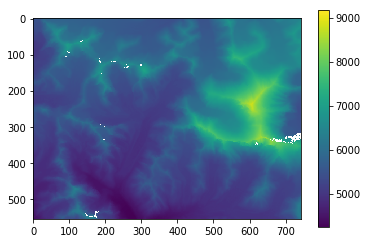

In [28]:
plt.imshow(elevation_median)
plt.colorbar()

### Enter xscale

In [29]:
elevation_xarray.shape

(29, 556, 743)

In [31]:
elevation_xarray = elevation_xarray.sortby('time')

In [30]:
import cartopy.crs as ccrs
import holoviews as hv
#import geoviews as gv
#import geoviews.feature as gf

hv.notebook_extension()



<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [32]:
ds_gv = hv.Dataset(elevation_xarray)
ds_gv

:Dataset   [lat,lon,time]   (elevation)

In [34]:
# make a plot with holoviews
%opts Image [colorbar=True fig_size=400] (cmap='viridis')
ds_gv.to(hv.Image, ['lat', 'lon'])


:HoloMap   [time]
   :Image   [lat,lon]   (elevation)

In [ ]:
#ds_hv.to(hv.Image, ['lon', 'lat'])

### implemented from https://gist.github.com/rabernat/bc4c6990eb20942246ce967e6c9c3dbe